In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


['sample_submission.csv', 'description.md', 'test.zip', 'train.csv', 'sample_submission.csv.zip', 'test', 'train.zip', 'train', 'train.csv.zip', 'aerial-cactus-identification']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

import keras


2025-08-18 19:40:05.715302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755546005.727933       8 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755546005.731858       8 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-18 19:40:05.746922: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
train_data = pd.read_csv('../input/train.csv')


In [5]:
train_data.shape


(14175, 2)

In [6]:
train_data.head()


,id,has_cactus
0,2de8f189f1dce439766637e75df0ee27.jpg,1
1,36704d250f236238e7f996812c48235d.jpg,1
2,eacde22fdc8c175972a5768e3daa8bc9.jpg,1
3,5d442f834da5e57d22b24802c32a8ca8.jpg,1
4,152491e0daf75c0e669400300ff7e645.jpg,1


In [7]:
train_data.has_cactus.unique()


array([1, 0])

<Axes: >

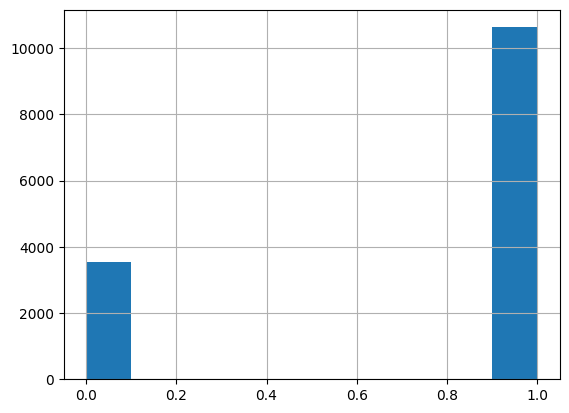

In [8]:
train_data.has_cactus.hist()


In [9]:
train_data.has_cactus.value_counts()


has_cactus
1    10628
0     3547
Name: count, dtype: int64

<Axes: >

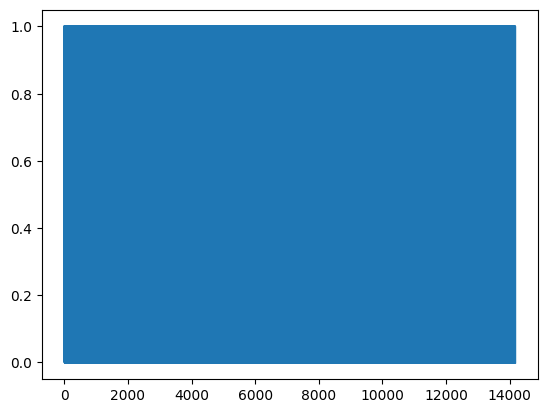

In [10]:
train_data.has_cactus.plot()


In [11]:
positive_examples = train_data[train_data.has_cactus==1]
negative_examples = train_data[train_data.has_cactus==0]


In [12]:
img = mpimg.imread('../input/train/train/' + positive_examples.id.tolist()[2])
plt.imshow(img)


FileNotFoundError: [Errno 2] No such file or directory: '../input/train/train/eacde22fdc8c175972a5768e3daa8bc9.jpg'

In [13]:
img = mpimg.imread('../input/train/train/' + negative_examples.id.tolist()[2])
plt.imshow(img)


FileNotFoundError: [Errno 2] No such file or directory: '../input/train/train/7780c9e9ac1deea5fd6a8984f659da90.jpg'

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(32, (5, 5), activation='relu'))
model.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-18 19:40:11.982835: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,638,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,927,081 (11.17 MB)

 Trainable params: 2,927,081 (11.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
opt = keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
train_data.shape[0]


14175

In [18]:
# dataaug = keras.preprocessing.image.ImageDataGenerator()


In [19]:
def image_generator(batch_size = 64, train=True):
    while True:
        if train:
            indexes = np.arange(train_data[:15000].shape[0])
        else:
            indexes = np.arange(train_data[15000:].shape[0])
        np.random.shuffle(indexes)
        N = int(len(indexes) / batch_size)
       

        # Read in each input, perform preprocessing and get labels
        for i in range(N):
            current_indexes = indexes[i*batch_size: (i+1)*batch_size]
            batch_input = []
            batch_output = [] 
            for index in current_indexes:
                img = mpimg.imread('../input/train/train/' + train_data.id[index])
                batch_input += [(img-127)/127]
                batch_output += [train_data.has_cactus[index]]
            
            batch_input = np.array( batch_input )
            batch_output = np.array( batch_output )
        
            yield( batch_input, batch_output.reshape(-1, 1) )


In [20]:
model.fit_generator(image_generator(), steps_per_epoch= train_data.shape[0] / 64, epochs=20)


AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [21]:
model.evaluate_generator(image_generator(train=False), steps=train_data[15000:].shape[0] / 64)


AttributeError: 'Sequential' object has no attribute 'evaluate_generator'

In [22]:
!ls ../input/test/test/* | wc -l


ls: cannot access '../input/test/test/*': No such file or directory
0


In [23]:
test_files = os.listdir('../input/test/test/')


FileNotFoundError: [Errno 2] No such file or directory: '../input/test/test/'

In [24]:
len(test_files)


NameError: name 'test_files' is not defined

In [25]:
batch = 40
all_out = []
for i in range(int(4000/batch)):
    images = []
    for j in range(batch):
        img = mpimg.imread('../input/test/test/'+test_files[i*batch + j])
        images += [img]
    out = model.predict(np.array(images))
    all_out += [out]


NameError: name 'test_files' is not defined

In [26]:
all_out = np.array(all_out).reshape(-1, 1)


In [27]:
all_out.shape


(0, 1)

In [28]:
sub_file = pd.DataFrame(data = {'id': test_files, 'has_cactus': all_out.reshape(-1).tolist()})


NameError: name 'test_files' is not defined

In [29]:
sub_file.head()


NameError: name 'sub_file' is not defined

In [30]:
sub_file.to_csv('sample_submission.csv', index=False)


NameError: name 'sub_file' is not defined